This code compares the behavior of animal groups before, during and after drone exchanges. We have scored each group's behavioral state during the two minutes prior to the drone exchange (the two minutes preceding the launch of the replacement drone), during the drone exchange (the time during which two drones are in flight), and the two minutes after the drone exchange (the two minutes after the replaced drone lands).

In [49]:
# import packages
import pandas as pd
from scipy.stats import wilcoxon
import seaborn as sns
import numpy as np

In [23]:
# load data
df = pd.read_csv('data/exchanges_clean.csv')

# reshape data
df2 = df.drop(['observation','start_flight', 'start_timestamp', 'end_flight', 'end_timestamp'], axis = 1)
df_new = df2.pivot(index = ['exchange_num','species'], columns = 'clip_type', values='group_behavior')
df_new.reset_index(inplace=True)  
df_new.index.rename('index', inplace = True)
df_new

clip_type,exchange_num,species,exchange,post,pre
index,,,,,
0,ob025-1,pz,0.0,0.0,0.0
1,ob029-1,imp,1.0,1.0,1.0
2,ob031-1,imp,1.0,1.0,0.0
3,ob033-1,pz,0.0,0.0,2.0
4,ob039-1,imp,0.0,0.0,0.0
...,...,...,...,...,...
63,ob114-1,pz,0.0,0.0,0.0
64,ob114-2,gz,0.0,0.0,0.0
65,ob114-2,imp,0.0,0.0,0.0


In [35]:
# Compare behavior before exchange to behavior during exchange
wilcoxon(df_new['pre'], df_new['exchange'], zero_method = 'pratt')

# Compare behavior during exchange to behavior after exchange
wilcoxon(df_new['exchange'], df_new['post'], zero_method = 'pratt')

# Compare behavior before exchange to after exchange
wilcoxon(df_new['pre'], df_new['post'], zero_method = 'pratt')

WilcoxonResult(statistic=382.0, pvalue=0.12224479755133902)

In [68]:
# Create a version of the behavior scores in which each score has a small value added to it. This will allow the
# data points to be jittered in a swarm plot so that all points can be displayed.
df['jittered_scores'] = (np.random.randint(-250,250,len(df))/1000) + df['group_behavior']

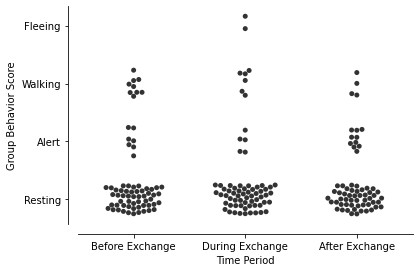

In [95]:
#ax = sns.violinplot(x = 'clip_type', y = 'group_behavior', data = df, order = ['pre', 'exchange', 'post'])
ax = sns.swarmplot(x = 'clip_type', y = 'jittered_scores', data = df, order = ['pre', 'exchange', 'post'], color = '0.2')
ax.set(xlabel='Time Period', ylabel='Group Behavior Score', yticks = [0,1,2,3], xticklabels = ['Before Exchange', 'During Exchange', 'After Exchange'],
      yticklabels = ['Resting', 'Alert', 'Walking', "Fleeing"])
sns.despine(offset = 10)